In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import os

In [107]:
caffe.set_mode_cpu()
net = caffe.Net(caffe_root + 'examples/deconvnet/vgg16_deploy.prototxt',
                '/home/lew/myCourse/caffe/models/VGG_ILSVRC_16_layers.caffemodel',
                caffe.TEST)
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

In [108]:
# set net to batch size of 50
net.blobs['data'].reshape(1,3,224,224)

In [119]:
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(caffe_root + 'examples/images/cat.jpg'))

In [110]:
net.params["conv1_1t"][0].data[...] = net.params["conv1_1"][0].data.transpose(0,1,3,2)
net.params["conv1_2t"][0].data[...] = net.params["conv1_2"][0].data.transpose(0,1,3,2)
net.params["conv2_1t"][0].data[...] = net.params["conv2_1"][0].data.transpose(0,1,3,2)
net.params["conv2_2t"][0].data[...] = net.params["conv2_2"][0].data.transpose(0,1,3,2)
net.params["conv3_1t"][0].data[...] = net.params["conv3_1"][0].data.transpose(0,1,3,2)
net.params["conv3_2t"][0].data[...] = net.params["conv3_2"][0].data.transpose(0,1,3,2)
net.params["conv3_3t"][0].data[...] = net.params["conv3_3"][0].data.transpose(0,1,3,2)
print net.params['conv1_1t'][0].data.shape, net.params['conv1_1'][0].data.shape

(64, 3, 3, 3) (64, 3, 3, 3)


In [115]:
out = net.forward()

In [102]:
print 256*28*28
oo = net.forward(end = "unpool3")
print net.blobs['pool3'].data[0].shape
d = net.blobs['pool3'].data[0].copy()
d = d.reshape(200704)
indices = np.argsort(d)
ind = indices[-1000:]
#print indices[-9:], net.blobs['pool3'].data[0][ind//784, (ind%784)//28, ind%784%28]

200704
(256, 28, 28)


In [103]:
keep = net.blobs['pool3'].data[0][ind//784, (ind%784)//28, ind%784%28]
net.blobs['pool3'].data[...] = 0
i = -1
net.blobs['pool3'].data[0][ind//784, (ind%784)//28, ind%784%28] = keep
#net.blobs['pool3'].data[0][ind[i]//784, (ind[i]%784)//28, ind[i]%784%28] = keep[i]
#print net.blobs['pool3'].data[0][ind//784, (ind%784)//28, ind%784%28] 
ii = net.blobs['pool3'].data[0] != 0

In [104]:
out = net.forward(start='unpool3')

In [151]:
print net.blobs['conv2_2'].data[0].shape
print 128*112*112
oo = net.forward(end = "conv2_2t")
print net.blobs['conv2_2'].data[0].shape
d = net.blobs['conv2_2'].data[0].copy()
d = d.reshape(1605632)
indices = np.argsort(d)
ind = indices[-500:]

(128, 112, 112)
1605632
(128, 112, 112)


In [152]:
keep = net.blobs['conv2_2'].data[0][ind//12544, (ind%12544)//112, ind%12544%112]
net.blobs['conv2_2'].data[...] = 0
i = -1
net.blobs['conv2_2'].data[0][ind//12544, (ind%12544)//112, ind%12544%112] = keep
#net.blobs['conv2_2'].data[0][ind[i]//12544, (ind[i]%12544)//112, ind[i]%12544%112] = keep[i]
print net.blobs['conv2_2'].data[0][ind//12544, (ind%12544)//112, ind%12544%112] 
ii = net.blobs['conv2_2'].data[0] != 0

[ 3274.69140625  3277.15478516  3277.70507812  3278.62890625  3280.66967773
  3281.65112305  3282.37768555  3282.86376953  3284.43530273  3284.47338867
  3285.28125     3286.22460938  3287.39550781  3288.20605469  3292.78125
  3294.16625977  3294.47338867  3295.40380859  3296.49438477  3296.8190918
  3296.91381836  3297.57226562  3306.02514648  3308.29003906  3310.33081055
  3310.68994141  3310.83666992  3311.56225586  3313.79345703  3315.98266602
  3317.36328125  3319.55322266  3324.16723633  3326.38867188  3328.0534668
  3328.14648438  3331.04418945  3331.42578125  3331.91918945  3332.1237793
  3332.13061523  3332.18115234  3333.66040039  3338.30639648  3338.34545898
  3338.46801758  3342.35327148  3346.62792969  3347.93310547  3352.51635742
  3353.72167969  3354.38256836  3354.65917969  3355.06030273  3355.41723633
  3356.61987305  3359.77612305  3362.94311523  3363.95483398  3364.14038086
  3365.32128906  3366.22509766  3367.61645508  3368.3996582   3368.88110352
  3369.41381836  3

In [153]:
out = net.forward(start='conv2_2t')

In [154]:
print net.blobs['unpool3'].data[0].max()
o = net.blobs['conv1_1t'].data[0].copy()
print o.shape
o -= o.min()
o /= o.max()
o *= 255
o = np.rollaxis(o, 0, 3)

print o.shape

14058.9
(3, 224, 224)
(224, 224, 3)


# Interesting findings! 
For the black dog picture. When I keep the strongest activation, I got a little piece of right eye, when keeping first 9, I got little left ear and right eye, when 50, right eye become clear, when 100, tails are seen.  I think 200 can be enough to reconstruct all the good information.

For the cat picture. When I keep the strongest activation, I got a clear right eye, when keeping first 9, I got two beautiful cat eyes, when 50, head and one ear appeared, when 100, another ear appeared.  I think 500 can be enough to reconstruct all the good information.

For deconv from conv2.

For the cat picture. When I keep the strongest activation, I got a little piece of ear, when keeping first 9, I got little two ear and right eye, when 50, two eyes and nose come, when 100, just like 50 but more clear.  And when 500, just more clear. Obviously, the face of the cat are the vital thing for the vgg net to keep.


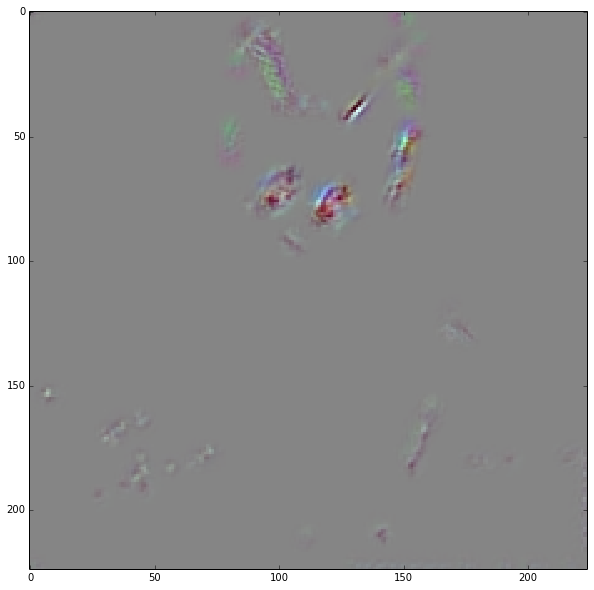

In [155]:
plt.imshow(o.astype(np.uint8))
#plt.savefig(caffe_root + 'examples/deconvnet/cat_conv2_50findeyeandear.jpg')

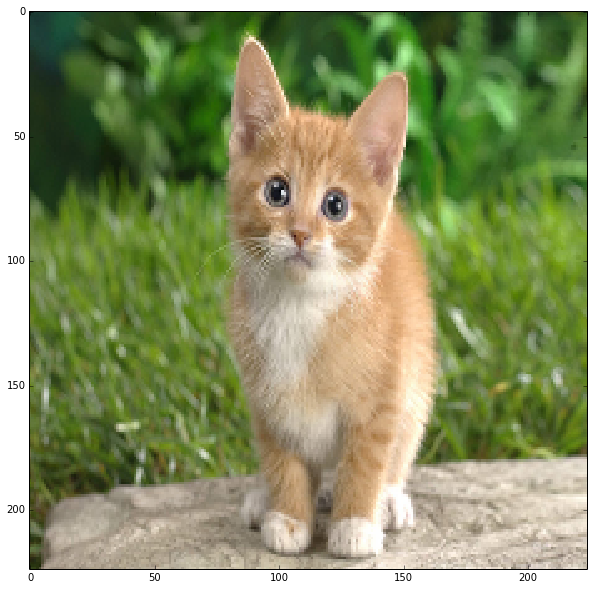

In [130]:
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[0]))